In [23]:
import os
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def CropImage(capturedImage):
    indices = np.where(capturedImage != [0])
    leftMostEdge = min(indices[1])
    rightMostEdge = max(indices[1])
    topMostEdge = min(indices[0])
    bottomMostEdge = max(indices[0])
    croppedImage = capturedImage[topMostEdge:bottomMostEdge, leftMostEdge:rightMostEdge]
    return croppedImage

In [25]:
def CannyThreshold(capturedImage):
    median = np.median(capturedImage)
    lowerThreshold = max(0, (0.7 * median))
    upperThreshold = min(255, (0.7 * median))
    CannyEdged = cv2.Canny(capturedImage, lowerThreshold, upperThreshold)
    return CannyEdged

In [26]:
def CalculateStrokeLength(image):
    length = len(np.where(image != [0])[0])
    return length

In [27]:
def CalculateCurvature(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    if dx == 0:
        return float("inf")
    return abs(dy / dx)

In [28]:
def FindFeatures(image):
    lines = cv2.HoughLinesP(
        image, 1, np.pi / 180, threshold=50, minLineLength=10, maxLineGap=10
    )
    features = []
    for line in lines:
        for x1, y1, x2, y2 in line:
            curvature = CalculateCurvature(x1, y1, x2, y2)
            angle = math.atan2(y2 - y1, x2 - x1)
            features.append([curvature, angle])
    return features

In [29]:
def CompareStrokeLengths(lenght1, lenght2):
    lengthDifference = (abs(lenght1 - lenght2) / max(lenght1, lenght2)) * 100
    return lengthDifference

In [30]:
def CompareFeaturs(features1, features2, angleThreshold=0.1, curvatureThreshold=0.5):
    maxFeatures = max(len(features1), len(features2))
    featuresMatched = 0
    if maxFeatures != len(features1):
        for _ in range(maxFeatures - len(features1)):
            features1.append([0, 0])
    if maxFeatures != len(features2):
        for _ in range(maxFeatures - len(features2)):
            features2.append([0, 0])
    angleDifferences = []
    curvatureDifferences = []
    for i in range(maxFeatures):
        f1 = features1[i]
        f2 = features2[i]
        curvatureDifference = abs(f1[0] - f2[0])
        angleDifference = abs(f1[1] - f2[1])
        angleDifferences.append(angleDifference)
        curvatureDifferences.append(curvatureDifference)

    angleThreshold = np.average(angleDifferences)
    curvatureThreshold = np.average(curvatureDifferences)
    for angleDifference, curvatureDifference in zip(
        angleDifferences, curvatureDifferences
    ):
        if (
            curvatureDifference < curvatureThreshold
            and angleDifference < angleThreshold
        ):
            featuresMatched += 1

    percentageDifference = (abs(maxFeatures - featuresMatched) / maxFeatures) * 100

    return percentageDifference

In [31]:
def ComputePixelMatch(image1, image2):
    count = 0
    Tcount = 0
    if image1.shape > image2.shape:
        for i in range(len(image2[0])):
            for j in range(len(image2[1])):
                try:
                    if image1[i][j] == image2[i][j]:
                        count += 1
                except:
                    Tcount += 1
                    break
                Tcount += 1
    else:
        for i in range(len(image1[0])):
            for j in range(len(image1[1])):
                try:
                    if image1[i][j] == image2[i][j]:
                        count += 1
                except:
                    Tcount += 1
                    break
                Tcount += 1

    percent = (abs(Tcount - count) / Tcount) * 100
    return percent

In [32]:
def CompareImages(image1, image2):
    length1 = CalculateStrokeLength(image1)
    length2 = CalculateStrokeLength(image2)
    lengthDifference = CompareStrokeLengths(length1, length2)
    if lengthDifference < 20:
        print(
            f"Images may be similar with {100-lengthDifference}% match of Stroke Length"
        )
        print("Proceeding to Feature Match")
        features1 = FindFeatures(image1)
        features2 = FindFeatures(image2)
        featureDifference = CompareFeaturs(features1, features2)
        if featureDifference < 30:
            print(
                f"Images may be similar with {100-featureDifference}% match of features"
            )
            print("Proceeding to Pixel Match")
            pixelMatchDifference = ComputePixelMatch(image1, image2)
            if pixelMatchDifference < 20:
                print("***********Horrayyyyy***********")
                print(f"Images Matched ,with {100-pixelMatchDifference}% match")
            else:
                print("Images cannot be similar")
        else:
            print("Images cannot be similar")

    else:
        print("Images cannot be similar")

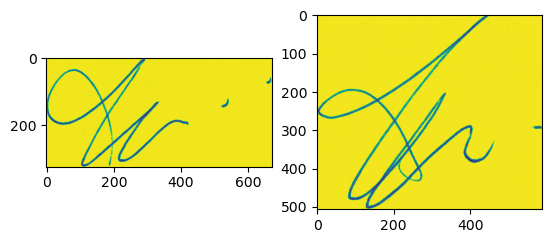

Images cannot be similar


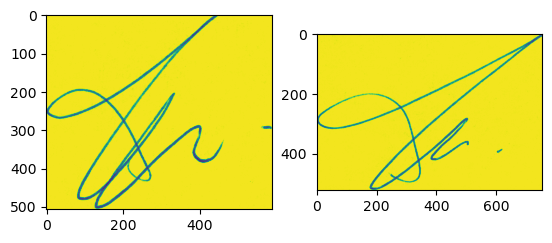

Images may be similar with 90.14836022904737% match of Stroke Length
Proceeding to Feature Match
Images cannot be similar


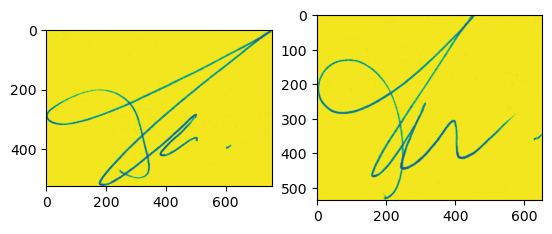

Images may be similar with 86.51743883394066% match of Stroke Length
Proceeding to Feature Match
Images cannot be similar


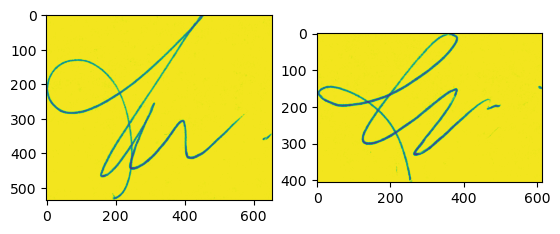

Images cannot be similar


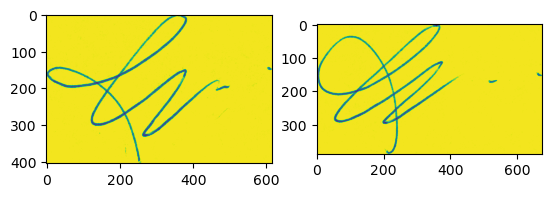

Images may be similar with 86.55613919894944% match of Stroke Length
Proceeding to Feature Match
Images may be similar with 74.0% match of features
Proceeding to Pixel Match
***********Horrayyyyy***********
Images Matched ,with 95.19496897932237% match


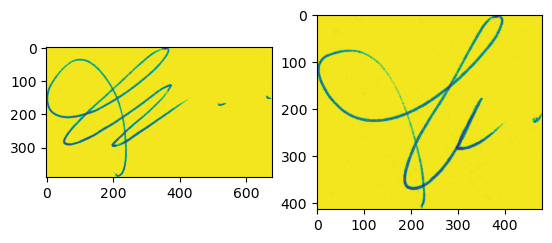

Images cannot be similar


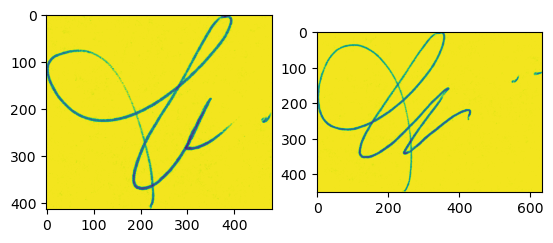

Images cannot be similar


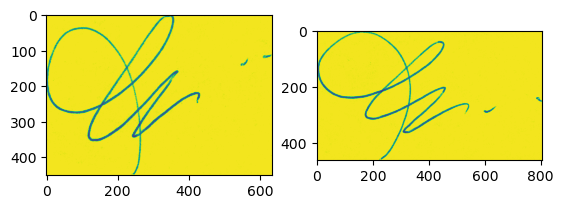

Images may be similar with 93.60709987966305% match of Stroke Length
Proceeding to Feature Match
Images cannot be similar


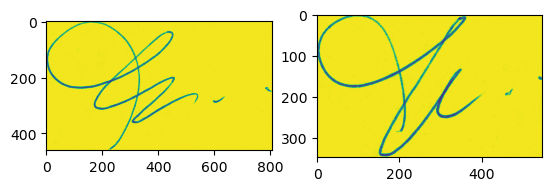

Images cannot be similar


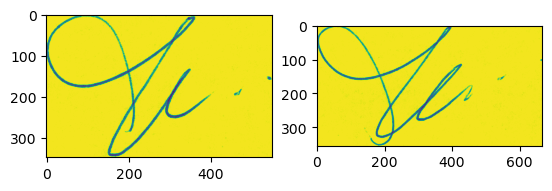

Images may be similar with 82.78718703976436% match of Stroke Length
Proceeding to Feature Match
Images cannot be similar


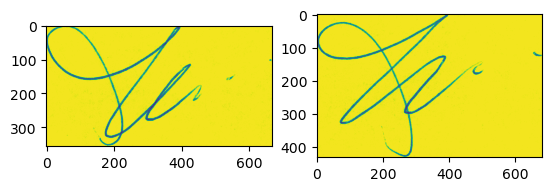

Images may be similar with 87.57053038852169% match of Stroke Length
Proceeding to Feature Match
Images may be similar with 75.51020408163265% match of features
Proceeding to Pixel Match
***********Horrayyyyy***********
Images Matched ,with 95.30363103407377% match


In [33]:
imageFiles = os.listdir("049/")
for i in range(len(imageFiles) - 1):
    file1 = "049/" + imageFiles[i]
    file2 = "049/" + imageFiles[i + 1]
    image1 = cv2.imread(file1, 0)
    Cannyedge1 = CannyThreshold(image1)
    croppedImage1 = CropImage(Cannyedge1)
    # cv2.imshow("Image1", croppedImage1)
    image2 = cv2.imread(file2, 0)
    Cannyedge2 = CannyThreshold(image2)
    croppedImage2 = CropImage(Cannyedge2)
    # cv2.imshow("Image2", croppedImage2)
    f, axarr = plt.subplots(1, 2)
    axarr[0].imshow(image1)
    axarr[1].imshow(image2)
    plt.show()
    CompareImages(croppedImage1, croppedImage2)
    # cv2.waitKey(0)